## Задание
* Выберите набор данных (датасет) для решения задачи классификации или регрессии.
* В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
* С использованием метода train_test_split разделите выборку на обучающую и тестовую.
* Обучите следующие модели:
* * одну из линейных моделей;
* * SVM;
* * дерево решений.
* Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
* Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
* Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score
%matplotlib inline 
sns.set(style="ticks")

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/Admission_Predict_Ver1.1.csv")

In [3]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
corr = data.corr()
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


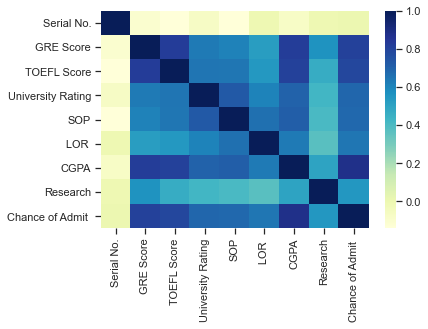

In [8]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap='YlGnBu')

## Между CGPA и Chance of Admit есть корреляция 0.88

In [10]:
x = data["CGPA"].values
y = data["Chance of Admit "].values

reg = BayesianRidge(fit_intercept=True).fit(x.reshape(-1, 1), y.reshape(-1, 1))
reg.coef_
reg.intercept_

-1.0433288693280354

In [12]:
def func(w, b, x):
    return w*x + b

In [17]:
x_t = list(range(6, 12))
y_t = [func(reg.coef_[0], reg.intercept_, x) for x in x_t]
y_tt = reg.predict(x.reshape(-1, 1))

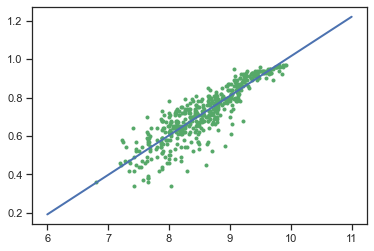

In [18]:
plt.plot(x, y, 'g.')
plt.plot(x_t, y_t, 'b', linewidth=2.0)
plt.show()

### Модель линейной регрессии дала неплохой результат

## SVM

In [19]:
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

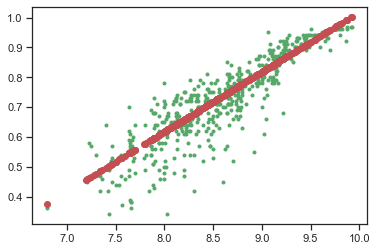

In [20]:
lin_SVR = LinearSVR(C=1.0, max_iter=10000)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))
plt.plot(x, y, 'g.')
plt.plot(x, predict, 'ro')

## Деревья решений

In [27]:
dec_tree = DecisionTreeRegressor(random_state=1, max_depth=2)
dec_tree.fit(data, data["Chance of Admit "])
dec_tree


DecisionTreeRegressor(max_depth=2, random_state=1)

In [28]:
dec_predict = dec_tree.predict(data)

[Text(167.4, 181.2, 'X[8] <= 0.715\nmse = 0.02\nsamples = 500\nvalue = 0.722'),
 Text(83.7, 108.72, 'X[8] <= 0.575\nmse = 0.008\nsamples = 236\nvalue = 0.601'),
 Text(41.85, 36.23999999999998, 'mse = 0.004\nsamples = 80\nvalue = 0.495'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.002\nsamples = 156\nvalue = 0.656'),
 Text(251.10000000000002, 108.72, 'X[8] <= 0.835\nmse = 0.006\nsamples = 264\nvalue = 0.83'),
 Text(209.25, 36.23999999999998, 'mse = 0.001\nsamples = 144\nvalue = 0.768'),
 Text(292.95, 36.23999999999998, 'mse = 0.001\nsamples = 120\nvalue = 0.903')]

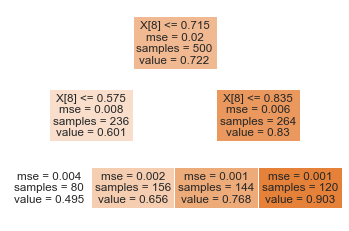

In [29]:
from sklearn import tree
tree.plot_tree(dec_tree, filled=True)

## Метрики качества

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 

print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  0.048356176421919375
Средняя квадратичная ошибка:  0.004400575179962326
Коэффициент детерминации:  0.77865169967127


Метрики для SVM-модели:

Средняя абсолютная ошибка:  0.048000840719299075
Средняя квадратичная ошибка:  0.004531621770186015
Коэффициент детерминации:  0.7720600749804865


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.03497883333333334
Средняя квадратичная ошибка:  0.0017660232051282055
Коэффициент детерминации:  0.9111692861023747


## Подбор гиперпараметров. Кросс-валидация

In [31]:
from sklearn.model_selection import cross_validate

In [32]:
scoring = {'mean': 'neg_mean_absolute_error', 'square': 'neg_mean_squared_error', 'r2': 'r2'}

In [33]:
scores_regr = cross_validate(BayesianRidge(fit_intercept=True), 
                         x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_regr

{'fit_time': array([0.00099945, 0.00099969, 0.0019958 ]),
 'score_time': array([0.0019989 , 0.00200224, 0.00099802]),
 'test_mean': array([-0.06390867, -0.04166959, -0.0434577 ]),
 'test_square': array([-0.00805285, -0.00264878, -0.00341377]),
 'test_r2': array([0.69147165, 0.77100056, 0.83635644])}

In [34]:
scores_svm = cross_validate(LinearSVR(C=1.0, max_iter=10000), 
                         x.reshape(-1, 1), y, cv=3, scoring=scoring)
scores_svm

{'fit_time': array([0.04097629, 0.0369761 , 0.03497982]),
 'score_time': array([0.00100136, 0.00101209, 0.00099945]),
 'test_mean': array([-0.06527236, -0.03968679, -0.04267425]),
 'test_square': array([-0.00838947, -0.00241486, -0.00330504]),
 'test_r2': array([0.67857482, 0.79122418, 0.84156854])}

In [36]:
scores_dec = cross_validate(DecisionTreeRegressor(random_state=1, max_depth=3), 
                         data, data["Chance of Admit "], cv=5, scoring=scoring)
scores_dec

{'fit_time': array([0.00599432, 0.00499773, 0.00599909, 0.00599551, 0.00599694]),
 'score_time': array([0.00599647, 0.00499654, 0.0070045 , 0.00299644, 0.00499654]),
 'test_mean': array([-0.01947024, -0.01658337, -0.01743311, -0.01960369, -0.01780489]),
 'test_square': array([-0.00070725, -0.00038489, -0.00040677, -0.00058168, -0.00045542]),
 'test_r2': array([0.97674954, 0.97437313, 0.96746869, 0.96943965, 0.97486837])}

In [37]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_regr['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_regr['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_regr['test_r2']))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_svm['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_svm['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_svm['test_r2']))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", np.mean(scores_dec['test_mean']))
print("Средняя квадратичная ошибка: ", np.mean(scores_dec['test_square']))
print("Коэффициент детерминации: ", np.mean(scores_dec['test_r2']))

Метрики для линейной модели:

Средняя абсолютная ошибка:  -0.049678655143161145
Средняя квадратичная ошибка:  -0.004705132163926633
Коэффициент детерминации:  0.7662762176604807


Метрики для SVM-модели:

Средняя абсолютная ошибка:  -0.04921113136081001
Средняя квадратичная ошибка:  -0.0047031212018939636
Коэффициент детерминации:  0.7704558470118542


Метрики для Decision Tree:

Средняя абсолютная ошибка:  -0.018179061248257487
Средняя квадратичная ошибка:  -0.0005072017860681037
Коэффициент детерминации:  0.9725798741030808


## Оптимизация с помощью решетчатого поиска

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [40]:
%%time
clf_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, scoring='r2')
clf_gs.fit(x.reshape(-1, 1), y)

Wall time: 97 ms


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             scoring='r2')

In [41]:
# Лучшая модель
clf_gs.best_estimator_

DecisionTreeRegressor(max_depth=4)

In [42]:
clf_gs.best_score_

0.7749073093532586

In [43]:
clf_gs.best_params_

{'max_depth': 4}

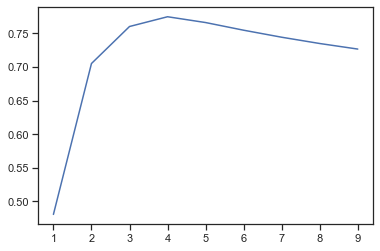

In [44]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Оптимизация SVM

In [45]:
param_grid = {'C': [0.1,1, 10, 100], 'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [46]:
grid = GridSearchCV(LinearSVR(),param_grid,refit=True,verbose=2)
grid.fit(x.reshape(-1, 1),y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ............................... C=0.1, epsilon=0.1, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ............................... C=0.1, epsilon=0.2, total=   0.0s
[CV] C=0.1, epsilon=0.2 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.2 ................................................
[CV] ................................. C=1, epsilon=0.2, total=   0.0s
[CV] C=1, epsilon=0.3 ................................................
[CV] ................................. C=1, epsilon=0.3, total=   0.0s
[CV] C=1, epsilon=0.3 ................................................
[CV] ................................. C=1, epsilon=0.3, total=   0.0s
[CV] 

[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.1 ..............................................
[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.1 ..............................................
[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.1 ..............................................
[CV] ............................... C=100, epsilon=0.1, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] ............................... C=100, epsilon=0.2, total=   0.0s
[CV] C=100, epsilon=0.2 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished


GridSearchCV(estimator=LinearSVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                     0.9, 1.0]},
             verbose=2)

In [47]:
grid.best_estimator_

LinearSVR(C=10, epsilon=0.1)

In [48]:
grid.best_score_

0.6827159871789266

In [49]:
grid.best_params_

{'C': 10, 'epsilon': 0.1}

In [50]:
parameters = {"alpha_1": np.logspace(-13,-5,10),
              "alpha_2": np.logspace(-9,-3,10),
              "lambda_1": np.logspace(-10,-5,10),
              "lambda_2": np.logspace(-11,-4,10)}

grid_regr = GridSearchCV(BayesianRidge(), parameters, cv=3, n_jobs=-1)
grid_regr.fit(x.reshape(-1, 1), y)    

GridSearchCV(cv=3, estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_1': array([1.00000000e-13, 7.74263683e-13, 5.99484250e-12, 4.64158883e-11,
       3.59381366e-10, 2.78255940e-09, 2.15443469e-08, 1.66810054e-07,
       1.29154967e-06, 1.00000000e-05]),
                         'alpha_2': array([1.00000000e-09, 4.64158883e-09, 2.15443469e-08, 1.00000000e-07,
       4.64158883e-07, 2.15443469e-06, 1.000000...
       2.15443469e-04, 1.00000000e-03]),
                         'lambda_1': array([1.00000000e-10, 3.59381366e-10, 1.29154967e-09, 4.64158883e-09,
       1.66810054e-08, 5.99484250e-08, 2.15443469e-07, 7.74263683e-07,
       2.78255940e-06, 1.00000000e-05]),
                         'lambda_2': array([1.00000000e-11, 5.99484250e-11, 3.59381366e-10, 2.15443469e-09,
       1.29154967e-08, 7.74263683e-08, 4.64158883e-07, 2.78255940e-06,
       1.66810054e-05, 1.00000000e-04])})

In [51]:
grid_regr.best_estimator_

BayesianRidge(alpha_1=1e-13, alpha_2=0.001, lambda_1=1e-05, lambda_2=1e-11)

In [52]:
grid_regr.best_score_

0.7662762307971316

In [53]:
grid_regr.best_params_

{'alpha_1': 1e-13, 'alpha_2': 0.001, 'lambda_1': 1e-05, 'lambda_2': 1e-11}

In [55]:
reg = BayesianRidge(fit_intercept=True, alpha_1=1e-05, alpha_2=1e-09, lambda_1=1e-10, lambda_2=0.0001).fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_tt = reg.predict(x.reshape(-1, 1))

lin_SVR = LinearSVR(C=1.0, max_iter=10000, epsilon=1.0)
lin_SVR.fit(x.reshape(-1, 1), y)
predict = lin_SVR.predict(x.reshape(-1, 1))

dec_tree = DecisionTreeRegressor(random_state=1, max_depth=3)
dec_tree.fit(data, data["Chance of Admit "])
dec_predict = dec_tree.predict(data)

In [190]:
print("Метрики для линейной модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, y_tt))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, y_tt))
print("Коэффициент детерминации: ", r2_score(y, y_tt))

print("\n\nМетрики для SVM-модели:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, predict))
print("Коэффициент детерминации: ", r2_score(y, predict))


print("\n\nМетрики для Decision Tree:\n")
print("Средняя абсолютная ошибка: ", mean_absolute_error(y, dec_predict))
print("Средняя квадратичная ошибка: ", mean_squared_error(y, dec_predict))
print("Коэффициент детерминации: ", r2_score(y, dec_predict))

Метрики для линейной модели:

Средняя абсолютная ошибка:  2.5508292802546
Средняя квадратичная ошибка:  10.512794897173503
Коэффициент детерминации:  0.6118698089221382


Метрики для SVM-модели:

Средняя абсолютная ошибка:  2.5996867264932724
Средняя квадратичная ошибка:  11.18839596468356
Коэффициент детерминации:  0.586926758668624


Метрики для Decision Tree:

Средняя абсолютная ошибка:  0.7095532407407409
Средняя квадратичная ошибка:  0.7222188657407407
Коэффициент детерминации:  0.9733358303760538


## После подбора параметров модели показали лучший результат, чем без подбора.